In [46]:
# 라이브러리 실행
import pandas as pd
import numpy as np
import statsmodels.api as sm #statsmodels 임포트
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns

In [50]:
# 데이터 불러오기
환불매출 = pd.read_csv("C:/Users/alsrn/Downloads/20210819_105159_ProductPrdchart.csv")
장바구니 = pd.read_csv("C:/Users/alsrn/파이썬/지수산식3번째 도전/통계서비스_장바구니분석_담긴상품_20210819 (2).csv")
긍평 = pd.read_csv("C:/Users/alsrn/파이썬/지수산식3번째 도전/긍평.csv")

In [51]:
# 데이터 합치기
df = pd.merge(환불매출, 장바구니, how = "left", on = "주문상품명")
df2 = pd.merge(df, 긍평, how = "left", on = "주문상품명")

In [59]:
df2.dtypes

주문상품명      object
주문수         int64
환불수         int64
환불비율      float64
매출액         int64
장바구니수     float64
조회수       float64
장바구니비율    float64
장비        float64
긍정평균      float64
리뷰수       float64
평균평점      float64
긍정합계      float64
dtype: object

In [208]:
# 전처리를 통해 새로운 칼럼 만들어냄
df2["평점긍정리뷰"] = df2["주문수"]  * df2["긍정평균"]
df2["평평평"] = df2["평균평점"] * df2["긍정평균"]
df2["신뢰도"] =  df2["장바구니수"] + df2["긍정평균"]
df2["안이탈율"] = df2["주문수"] * df2["장바구니수"]

<AxesSubplot:xlabel='매출액', ylabel='신뢰도'>

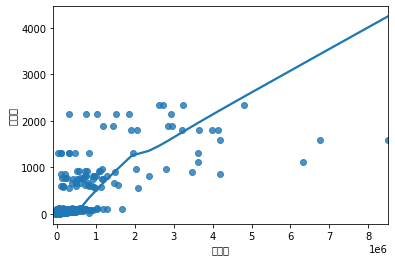

In [207]:
# 매출액, 신뢰도 간 선형회귀
sns.regplot(df2['매출액'],df2["신뢰도"], lowess=True) #X:매출액, Y:신뢰도

In [182]:
# df2에서 환불비율이 0인 데이터 제거
df2 = df2.drop(df2[df2["환불비율"] == 0].index)

<AxesSubplot:xlabel='매출액', ylabel='환불비율'>

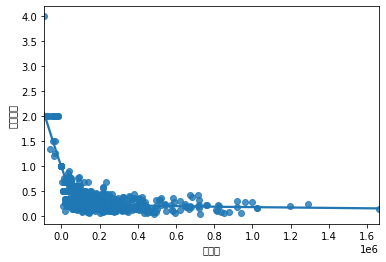

In [189]:
# 이상치를 제거하고 나서의 선형회귀분석
sns.regplot(df2['매출액'][50:],df2['환불비율'][50:], lowess=True)

In [115]:
df.shape

(3247, 9)

In [116]:
#df2d=에서 na값 제거
df2 = df2.dropna(axis=0)

In [213]:
x_data = df2[["안이탈율","환불비율","신뢰도"]] #X1 X2
target = df2[["매출액"]]# Y1

In [214]:
x_data1 = sm.add_constant(x_data, has_constant = "add")

In [215]:
multi_model = sm.OLS(target, x_data1) # x=x_data1,y=target
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    매출액   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     689.8
Date:                Thu, 19 Aug 2021   Prob (F-statistic):          3.50e-240
Time:                        15:58:47   Log-Likelihood:                -13901.
No. Observations:                 976   AIC:                         2.781e+04
Df Residuals:                     972   BIC:                         2.783e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.542e+05   2.28e+04     11.125      0.000    2.09e+05    2.99e+05
안이탈율           8.1622      0.399     20.433      0.000       7.378       8.946
환불비율       -2.492e+05   3.17e+04     -7.859      0.000   -3.11e+05   -1.87e+05
신뢰도          242.7789     62.082      3.911      0.000     120.948     364.610
==============================================================================
Omnibus:                      995.921   Durbin-Watson:                   1.212
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           164864.357
Skew:                           4.327   Prob(JB):                         0.00
Kurtosis:                      66.080   Cond. No.                     1.72e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- no.observation : 데이터 개수
- df.model : 사용한 예측 변수의 개수 
- df residuals : 데이터개수에서 자유도 개수 뺀 값 (No.observations - (Df Model + 1)

- R-squared, adj.R-squared, AIC, BIC 등이 있다. 여러 모형 중에 적합도 지수가 좋은 모형을 선택
- R-squred : 데이터의 성능을 나타냄(1에 가까울수록, 성능이 좋음)
- coef : 회귀계수
- std err : 표준 오차
- t : t-test
- Prob(F-statistics) : 모형에 대한 p-value 로 통상 0.05이하인 경우 통계적으로 유의하다고 판단합니다.
- P>[t] : 각 독립변수의 계수에 대한 p-value로 해당 독립변수가 유의미한지 판단합니다.



In [216]:
fitted_multi_model.params # 파라미터 값 추출

const    254192.747384
안이탈율          8.162219
환불비율    -249228.100810
신뢰도         242.778931
dtype: float64

In [ ]:
# 최종 계수 반영
구매전환점수 : 0.001 (1) -> 0.001
환불비율 : -30 (30000) -> -0.3
구매의사점수 : 0.03 (30) -> 0.03